In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [173]:
df_train = pd.read_csv('C:\\Users\\10674329\\Downloads\\train.csv')
df_test = pd.read_csv('C:\\Users\\10674329\\Downloads\\test.csv')

In [174]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [175]:
df_train = df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1)
df_test = df_test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1)

In [176]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


In [177]:
df_train.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [178]:
columns = ['HomePlanet', 'CryoSleep','Destination','Age','VIP','Cabin']
df_train[columns] = df_train[columns].fillna(method = 'ffill')
df_test[columns] = df_test[columns].fillna(method = 'ffill')

In [179]:
#extracting the cabin type from the column cabin
cab_train = [x for x in df_train['Cabin']]
cab_test = [x for x in df_test['Cabin']]
cabin_train = []
cabin_test = []
for i in cab_train:
    cabin_train.append(i.split('/')[2])

for i in cab_test:
    cabin_test.append(i.split('/')[2])

In [180]:
#removing existing Cabin column
df_train = df_train.drop('Cabin',axis=1)
df_test = df_test.drop('Cabin',axis=1)
#adding new cabin column
df_train['Cabin'] = cabin_train
df_test['Cabin'] = cabin_test

In [181]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Cabin
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,S


In [182]:
df_test.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Cabin          0
dtype: int64

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIP', ylabel='count'>

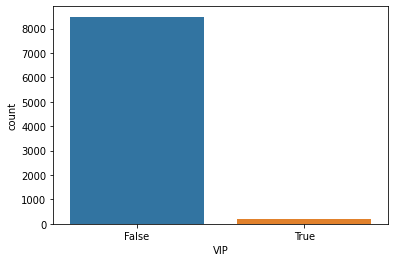

In [183]:
sns.countplot(df_train.VIP)

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

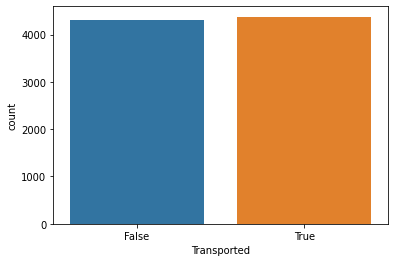

In [184]:
sns.countplot(df_train.Transported)

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

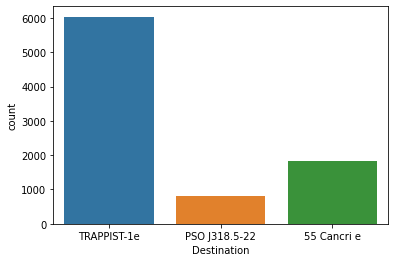

In [185]:
sns.countplot(df_train.Destination)

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

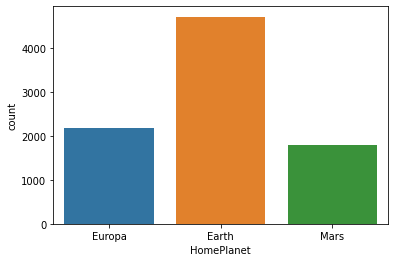

In [186]:
sns.countplot(df_train.HomePlanet)

In [187]:
#replacing boolean to 0 and 1
df_train["CryoSleep"] = df_train["CryoSleep"].astype(int)
df_train["Transported"] = df_train["Transported"].astype(int)
df_train["VIP"] = df_train["VIP"].astype(int)
df_test["CryoSleep"] = df_test["CryoSleep"].astype(int)
df_test["VIP"] = df_test["VIP"].astype(int)

In [188]:
HomePlanet = pd.get_dummies(df_train.HomePlanet)
Destination = pd.get_dummies(df_train.Destination)
Cabin = pd.get_dummies(df_train.Cabin)
HomePlanet_test = pd.get_dummies(df_test.HomePlanet)
Destination_test = pd.get_dummies(df_test.Destination)
Cabin_test = pd.get_dummies(df_test.Cabin)

In [189]:
df_train = pd.concat([df_train.drop(['HomePlanet','Destination','Cabin'],axis=1),HomePlanet,Destination,Cabin],axis=1)
df_test = pd.concat([df_test.drop(['HomePlanet','Destination','Cabin'],axis=1),HomePlanet_test,Destination_test,Cabin_test],axis=1)

In [190]:
X_train = df_train.drop("Transported", axis=1)
y_train = df_train["Transported"]
X_test  = df_test.copy()
X_train.shape, y_train.shape, X_test.shape

((8693, 12), (8693,), (4277, 12))

In [191]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)
acc_log = round(linear_model.score(X_train, y_train) * 100, 2)
acc_log

50.36

In [192]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

54.01

In [193]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

54.2

In [194]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

49.64

In [195]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


50.73

In [196]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

50.36

In [197]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [198]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [199]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

76.36

In [200]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,76.36
4,Naive Bayes,54.20
0,Support Vector Machines,54.01
7,Linear SVC,50.73
2,Logistic Regression,50.36
6,Stochastic Gradient Decent,50.36
5,Perceptron,49.64


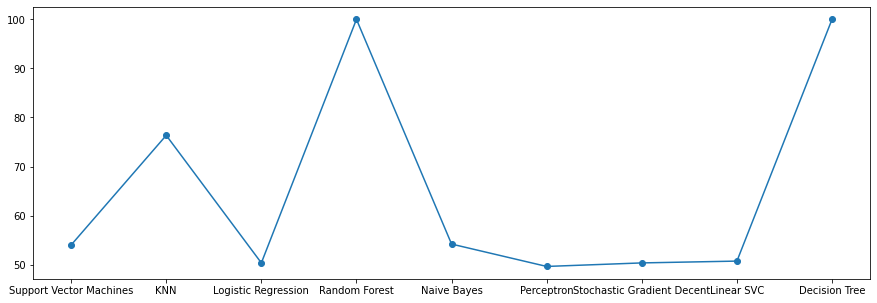

In [201]:
plt.figure(figsize=(15,5))
x_axis = ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree']
y_axis = [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
plt.plot(x_axis,y_axis, linestyle='-', marker='o')

In [204]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Transported": decision_tree_pred
    })

In [202]:
decision_tree_pred = decision_tree_pred.astype(bool)

In [203]:
decision_tree_pred

array([False, False,  True, ...,  True,  True, False])

In [205]:
submission.to_csv('Transported_prediction.csv',index=False)